# Project 8: Personal Data & Visualization 



In [1]:
#import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
import datetime


# Part 1: Extracting timestamps from your personal data


In [2]:
# reading my own personal data
levy_ip_logs = pd.read_csv("LevyTimeStamp.csv")
#read only the Activity Timestamp
levy_ip_logs = pd.DataFrame(levy_ip_logs["Activity Timestamp"])
levy_ip_logs

,Activity Timestamp
0,2023-03-10 07:38:20 UTC
1,2023-03-10 07:38:20 UTC
2,2023-03-10 07:38:08 UTC
3,2023-03-10 07:38:08 UTC
4,2023-03-10 07:37:49 UTC
...,...
288502,2023-02-11 08:26:25 UTC
288503,2023-02-11 08:26:25 UTC
288504,2023-02-11 08:26:24 UTC
288505,2023-02-11 08:14:46 UTC


# Part 2: Analyzing timestamp data for patterns

In [3]:
# Reading Emily's Personal Data
emily_ip_logs = pd.read_csv("ip_logs.csv")
emily_ip_logs["date"][1:-1].to_csv("Emily_SocialMedia_timestamps.csv")
emily_ip_logs

,date,ip
0,registration ip,71.85.26.71
1,2022-12-27 02:06:16 UTC,107.77.205.173
2,2022-12-30 06:23:07 UTC,71.85.26.71
3,2022-12-30 23:44:21 UTC,71.85.26.71
4,2022-12-31 06:14:25 UTC,71.85.26.71
...,...,...
149,2023-04-04 00:50:28 UTC,71.85.26.71
150,2023-04-04 04:41:37 UTC,71.85.26.71
151,2023-04-04 06:58:32 UTC,71.85.26.71
152,2023-04-04 15:17:15 UTC,71.85.26.71


In [4]:
df_dateTimes = pd.DataFrame()

In [5]:
df_dateTimes["Timestamp"] = pd.to_datetime(emily_ip_logs["date"][1:-1])
df_dateTimes = pd.DataFrame(df_dateTimes)

In [6]:
df_dateTimes

,Timestamp
1,2022-12-27 02:06:16+00:00
2,2022-12-30 06:23:07+00:00
3,2022-12-30 23:44:21+00:00
4,2022-12-31 06:14:25+00:00
5,2023-01-01 23:21:39+00:00
...,...
148,2023-04-03 22:49:13+00:00
149,2023-04-04 00:50:28+00:00
150,2023-04-04 04:41:37+00:00
151,2023-04-04 06:58:32+00:00


In [7]:
df_dateTimes["diff"] = df_dateTimes.diff()
df_dateTimes

,Timestamp,diff
1,2022-12-27 02:06:16+00:00,NaT
2,2022-12-30 06:23:07+00:00,3 days 04:16:51
3,2022-12-30 23:44:21+00:00,0 days 17:21:14
4,2022-12-31 06:14:25+00:00,0 days 06:30:04
5,2023-01-01 23:21:39+00:00,1 days 17:07:14
...,...,...
148,2023-04-03 22:49:13+00:00,0 days 01:36:58
149,2023-04-04 00:50:28+00:00,0 days 02:01:15
150,2023-04-04 04:41:37+00:00,0 days 03:51:09
151,2023-04-04 06:58:32+00:00,0 days 02:16:55


In [8]:
#Emily's data has positive timedelta meaning the end time occurs after the start time 
#The substraction of two close times such that you substract the previous B
#from A, in other words A-B, gives a time in  between two activities which is positive. 

df_dateTimes['diff'] = df_dateTimes['diff'].abs()
df_dateTimes

,Timestamp,diff
1,2022-12-27 02:06:16+00:00,NaT
2,2022-12-30 06:23:07+00:00,3 days 04:16:51
3,2022-12-30 23:44:21+00:00,0 days 17:21:14
4,2022-12-31 06:14:25+00:00,0 days 06:30:04
5,2023-01-01 23:21:39+00:00,1 days 17:07:14
...,...,...
148,2023-04-03 22:49:13+00:00,0 days 01:36:58
149,2023-04-04 00:50:28+00:00,0 days 02:01:15
150,2023-04-04 04:41:37+00:00,0 days 03:51:09
151,2023-04-04 06:58:32+00:00,0 days 02:16:55


Answer: What is the longest time between timestamps? 

In [9]:
df_dateTimes["diff"].max()

Timedelta('6 days 04:26:02')

What is the average time between timestamps?

In [10]:
df_dateTimes["diff"].mean()

Timedelta('0 days 15:39:48.470198675')

Answer: What is the day with the most timestamps? How many events (timestamps) were on that day?

In [11]:
days = df_dateTimes["Timestamp"].dt.strftime("%Y-%m-%d")
days

1      2022-12-27
2      2022-12-30
3      2022-12-30
4      2022-12-31
5      2023-01-01
          ...    
148    2023-04-03
149    2023-04-04
150    2023-04-04
151    2023-04-04
152    2023-04-04
Name: Timestamp, Length: 152, dtype: object

In [12]:
dayCount = {}
for day in days: 
    if day not in dayCount: 
        dayCount[day] = 0
    dayCount[day] = dayCount[day] + 1
dayCount

{'2022-12-27': 1,
 '2022-12-30': 2,
 '2022-12-31': 1,
 '2023-01-01': 1,
 '2023-01-02': 1,
 '2023-01-03': 1,
 '2023-01-04': 1,
 '2023-01-05': 2,
 '2023-01-06': 1,
 '2023-01-07': 1,
 '2023-01-08': 1,
 '2023-01-09': 2,
 '2023-01-10': 1,
 '2023-01-11': 1,
 '2023-01-12': 1,
 '2023-01-13': 2,
 '2023-01-14': 2,
 '2023-01-15': 1,
 '2023-01-21': 1,
 '2023-01-23': 1,
 '2023-01-24': 3,
 '2023-01-25': 2,
 '2023-01-26': 1,
 '2023-01-27': 2,
 '2023-01-28': 2,
 '2023-01-29': 1,
 '2023-02-03': 1,
 '2023-02-04': 2,
 '2023-02-05': 2,
 '2023-02-06': 1,
 '2023-02-07': 2,
 '2023-02-09': 1,
 '2023-02-11': 1,
 '2023-02-13': 1,
 '2023-02-19': 1,
 '2023-02-20': 4,
 '2023-02-22': 1,
 '2023-02-23': 1,
 '2023-02-24': 1,
 '2023-02-25': 1,
 '2023-02-26': 3,
 '2023-02-27': 1,
 '2023-02-28': 3,
 '2023-03-01': 4,
 '2023-03-02': 2,
 '2023-03-03': 2,
 '2023-03-05': 1,
 '2023-03-06': 1,
 '2023-03-07': 1,
 '2023-03-08': 5,
 '2023-03-09': 3,
 '2023-03-10': 3,
 '2023-03-11': 3,
 '2023-03-12': 3,
 '2023-03-13': 2,
 '2023-03-

In [13]:
#day with the most timestamps 
maxUse = -1
maxDay = None 
for day in dayCount: 
    if dayCount[day] > maxUse: 
        maxUse = dayCount[day]
        maxDay = day

print("The day with the most timestamps is: " + str(maxDay) + " with " + str(maxUse) + " uses.")

The day with the most timestamps is: 2023-03-30 with 7 uses.


Answer: What is the month with the most timestamps? How many events (timestamps) were on that month?

In [14]:
months = df_dateTimes["Timestamp"].dt.strftime("%Y-%m")
months

1      2022-12
2      2022-12
3      2022-12
4      2022-12
5      2023-01
        ...   
148    2023-04
149    2023-04
150    2023-04
151    2023-04
152    2023-04
Name: Timestamp, Length: 152, dtype: object

In [15]:
monthCount = {}
for month in months: 
    if month not in monthCount: 
        monthCount[month] = 0
    monthCount[month] = monthCount[month] + 1
monthCount

{'2022-12': 4, '2023-01': 32, '2023-02': 27, '2023-03': 77, '2023-04': 12}

In [16]:
#month with the most timestamps -- goes through each 
maxMonthUse = -1
maxMonth = None 
for day in monthCount: 
    if monthCount[month] > maxMonthUse: 
        maxMonthUse = monthCount[month]
        maxMonth = month
print("The month with the most timestamps is: " + str(maxMonth) + " with " + str(maxMonthUse) + " uses.")

The month with the most timestamps is: 2023-04 with 12 uses.


Answer: What do you think the source of this data is? Write a few sentences explaining your reasoning. What other data might help you verify if you are correct?

I think That the source of Emily's data is from an app that She doesn't often. The reason is because of her activities are very low. Looking at the timestamps for instance the time between her activities. It is clear that it is not used a lot. 

For the days and months that your partner identified as having the most timestamps, try to figure out what was happening on those days. What other data might help you figure this out?

Emily is right about me, the source is google. The day with most uses was on 2/16/2023 and I have no idea what I was doing.Basically Google saves almost every move I make on the internet. Febuary was also a month that I had had the most uses, again I don't know. I use a lot of social media, Maybe these are the causes of so many timestamps.

Discuss your results together -- what did you learn about yourself and your partner through doing this?

# Part 3: Make a combined visualization

In [17]:
#'Normalizing' Levy's data to make into a graph
levy_data = levy_ip_logs["Activity Timestamp"].to_dict()
levy_timestamp1 = [str(value) for value in levy_data.values()]
levy_timestamp1 = [s[:-4] for s in levy_timestamp1]

levy_timestamp1

['2023-03-10 07:38:20',
 '2023-03-10 07:38:20',
 '2023-03-10 07:38:08',
 '2023-03-10 07:38:08',
 '2023-03-10 07:37:49',
 '2023-03-10 07:37:32',
 '2023-03-10 07:37:24',
 '2023-03-10 07:37:03',
 '2023-03-10 07:36:47',
 '2023-03-10 07:36:35',
 '2023-03-10 07:36:34',
 '2023-03-10 07:36:34',
 '2023-03-10 07:36:34',
 '2023-03-10 07:36:34',
 '2023-03-10 07:36:34',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:32',
 '2023-03-10 07:36:32',
 '2023-03-10 07:36:32',
 '2023-03-10 07:36:32',
 '2023-03-10 07:36:31',
 '2023-03-10 07:36:31',
 '2023-03-10 07:36:30',
 '2023-03-10 07:36:15',
 '2023-03-10 07:35:48',
 '2023-03-10 07:35:43',
 '2023-03-10 07:35:31',
 '2023-03-10 07:35:04',
 '2023-03-10 07:34:56',
 '2023-03-10 07:34:53',
 '2023-03-10 07:34:51',
 '2023-03-10 07:34:50',
 '2023-03-10 07:34:46',
 '2023-03-10 07:34:45',
 '2023-03-10 07:34:45',
 '2023-03-10 07:34:45',
 '2023-03-10 07:

In [18]:
#'Normalizing' Emily's data to make into a graph
emily_timestamp_values = emily_ip_logs['date'].to_dict()

emily_timestamp1 = {}

for key, value in emily_timestamp_values.items():
    # Remove the last three characters from the value string
    new_value = value[:-4]
    emily_timestamp1[key] = new_value
    
emily_timestamp1 = list(emily_timestamp1.values())
emily_timestamp1.pop(0)

emily_timestamp1

['2022-12-27 02:06:16',
 '2022-12-30 06:23:07',
 '2022-12-30 23:44:21',
 '2022-12-31 06:14:25',
 '2023-01-01 23:21:39',
 '2023-01-02 05:52:16',
 '2023-01-03 06:02:18',
 '2023-01-04 05:50:19',
 '2023-01-05 23:47:24',
 '2023-01-05 23:53:32',
 '2023-01-06 08:25:31',
 '2023-01-07 08:18:04',
 '2023-01-08 23:08:07',
 '2023-01-09 07:57:46',
 '2023-01-09 23:14:19',
 '2023-01-10 23:06:34',
 '2023-01-11 02:18:23',
 '2023-01-12 20:27:59',
 '2023-01-13 19:50:11',
 '2023-01-13 23:12:59',
 '2023-01-14 01:49:01',
 '2023-01-14 07:52:58',
 '2023-01-15 02:06:15',
 '2023-01-21 06:32:17',
 '2023-01-23 21:08:08',
 '2023-01-24 01:51:37',
 '2023-01-24 08:02:13',
 '2023-01-24 20:53:30',
 '2023-01-25 01:55:35',
 '2023-01-25 20:15:32',
 '2023-01-26 01:59:02',
 '2023-01-27 01:44:37',
 '2023-01-27 20:03:38',
 '2023-01-28 01:55:16',
 '2023-01-28 20:01:23',
 '2023-01-29 01:50:19',
 '2023-02-03 02:13:14',
 '2023-02-04 01:55:17',
 '2023-02-04 20:10:21',
 '2023-02-05 01:52:28',
 '2023-02-05 20:02:27',
 '2023-02-06 01:

In [19]:
len(levy_timestamp1), len(emily_timestamp1)

(288507, 153)

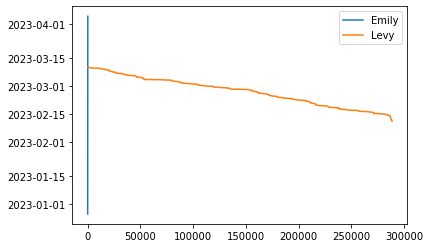

In [20]:
s1 = pd.Series(pd.to_datetime(emily_timestamp1))
s2 = pd.Series(pd.to_datetime(levy_timestamp1))

# Create DataFrame from the two Series
df = pd.DataFrame({'Emily': s1, 'Levy': s2})

# Plot the DataFrame using pandas
df.plot()

# Show the plot
plt.show()

In [21]:
len(levy_timestamp1), len(emily_timestamp1)

(288507, 153)

This first graph takes into account all of Levy's data, 288505, and compares it to all of Emily's data: 150. 

The x-axis of the plot corresponds to the index values of the DataFrame, which in this case ranges from 0 to 149 for Emily's data and from 0 to 288504 for Levy's data.

Since Emily's list only has 150 values, each value is plotted at its corresponding index value on the x-axis, resulting in a stright vertical line. In contrast, Levy's list has 288505 values, so each value is plotted at a different index value on the x-axis, resulting in a more horizontal line.

In [22]:
emily_timestamp = emily_timestamp1[:150 :]
levy_timestamp = levy_timestamp1[:150 :]

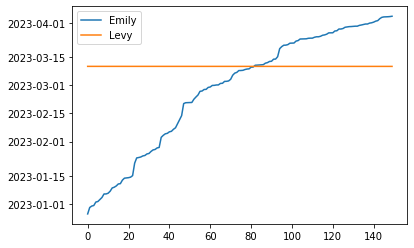

In [23]:
s1 = pd.Series(pd.to_datetime(emily_timestamp))
s2 = pd.Series(pd.to_datetime(levy_timestamp))

# Create a pandas DataFrame from the two Series
df = pd.DataFrame({'Emily': s1, 'Levy': s2})

# Plot the DataFrame using pandas
df.plot()

# Show the plot
plt.show()

If we cut Levy's data down to 150 values, so that both Emily and Levy have the same number of values, we see that for the first 150 values in levy's data, they are all on the same day: March 15th, 2023. Emily, on the other hand, has data from a much longer period of time, begining in January and ending in April. This makes her plotted data much more varied than Levy's. 

This tells us that the source of Levy's data is an app or program that is used multipal times a day, where as Emily's data is sourced from something that she only uses once a day or a few times a week. 


# Part 4: Analyze and visualize an additional element from  your personal data


For this part of the project, I decided to analyze my personal Dataframe.

Question 1: What are my top 10 most days with the highest Timestamps.


In [61]:
from collections import Counter
import datetime

# Convert list of timestamps to a list of datetime objects
dates = [datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S') for date_str in levy_timestamp1]

# Extract the month component and count the occurrences using a Counter object
counts = Counter(date.month for date in dates)

# Convert counts to a list of values
levy_month_count = list(counts.values())

# Extract the month component from the keys of the Counter object and convert it to a list
levy_month_use = list(counts.keys())

# Print the resulting monthly counts and month values
print(levy_month_count)
print(levy_month_use)


[111001, 177506]
[3, 2]


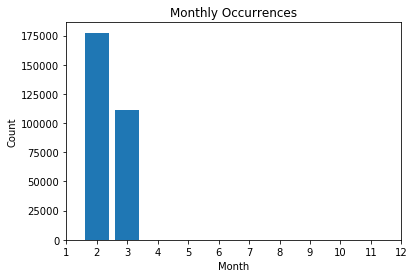

In [62]:
# Convert list of timestamps to pandas dataframe
df = pd.DataFrame({'timestamp': levy_timestamp1})

# Convert timestamp column to datetime format and set it as the index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample dataframe by month and count the occurrences of each month
counts = df.resample('M').size()

# Convert counts to a list of values
levy_month_count = counts.tolist()

# Extract the month component from the index and convert it to a list
levy_month_use = counts.index.month.tolist()

# Create a bar chart of the monthly counts
plt.bar(levy_month_use, levy_month_count)
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Occurrences')
plt.show()

1. What is the month with more occurences?
Febuary

2. How many uses? 177506